## Exemple base 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ciboulette.base.ciboulette as Cbl
import ciboulette.base.constent as C

- Class initialisation

In [2]:
cbl = Cbl.Ciboulette()

- Table edition

In [3]:
cbl.table.pprint(max_width = 255)

API        SERVER       DEVICE FOCAL DIAM SITE_LAT SITE_LONG SITE_ELEV  INSTRUME  NAXIS1 NAXIS2 BINXY PIXELXY FILTER     NAME     OBSERVER DATASET     ARCHIVES      RA DEC  OBJECT
---- ------------------ ------ ----- ---- -------- --------- --------- ---------- ------ ------ ----- ------- ------ ------------ -------- ------- ---------------- --- ---- ------
2000 192.168.1.18:11111      0  85.0   60  49.5961    359.65       100 Atik 383L+   3326   2504     1     5.4      L CIBOULETTE-A     CAM1 dataset dataset/archives 0.0 90.0   INIT


- Filter initialisation

In [4]:
cbl.filtername = 'CLS'

- Site initialisation

In [5]:
cbl.site = {"LAT": 49.51,"LONG": 359.65,"ELEV": 105}

- Instrument initialisation, optic and camera

In [6]:
cbl.samyang85_1_4
cbl.atiktitan

- Object, RA and DEC initialisation whit object name of **astroquery.simbad**

In [7]:
cbl.positionsbyname = 'ngc869'

- Editing changes

In [8]:
cbl.table['INSTRUME', 'FOCAL', 'FILTER', 'RA', 'DEC', 'OBJECT'].pprint()

 INSTRUME  FOCAL FILTER         RA                DEC          OBJECT 
---------- ----- ------ ------------------ ----------------- ---------
Atik Titan    85    CLS 2.3166666666666664 57.12833333333333 NGC   869


- Projection of the observed location and editing of basic informations. The Milky Way, star clusters NGC of magnitude less than 16 (blue), Herbig Ae/Be catalog (orange) and cepheid catalog (red).

Herbig catalog:

Herbig Ae/Be accretion rates & mechanisms (Wichittanakom+ 2020). Accretion properties of Herbig Ae/Be stars in Vioque et al. (2018, Cat. J/A+A/620/A128). CDS J/MNRAS/493/234

Cepheid Catalog:

CDS I/345/cepheid


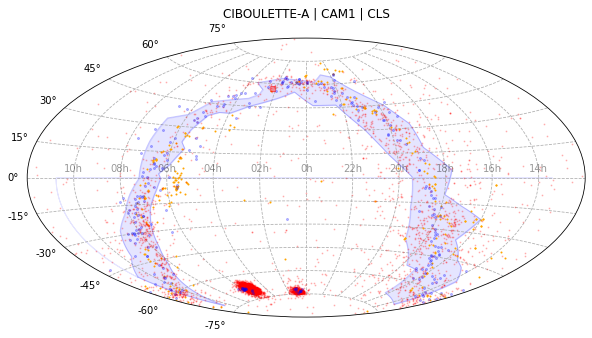

In [9]:
cbl.projections

- Stars field create and display. The catalog used is **GAIA-EDR3** with the inquiries on the **CDS - VizieR** website

In [10]:
data,WCS,title = cbl.starmap

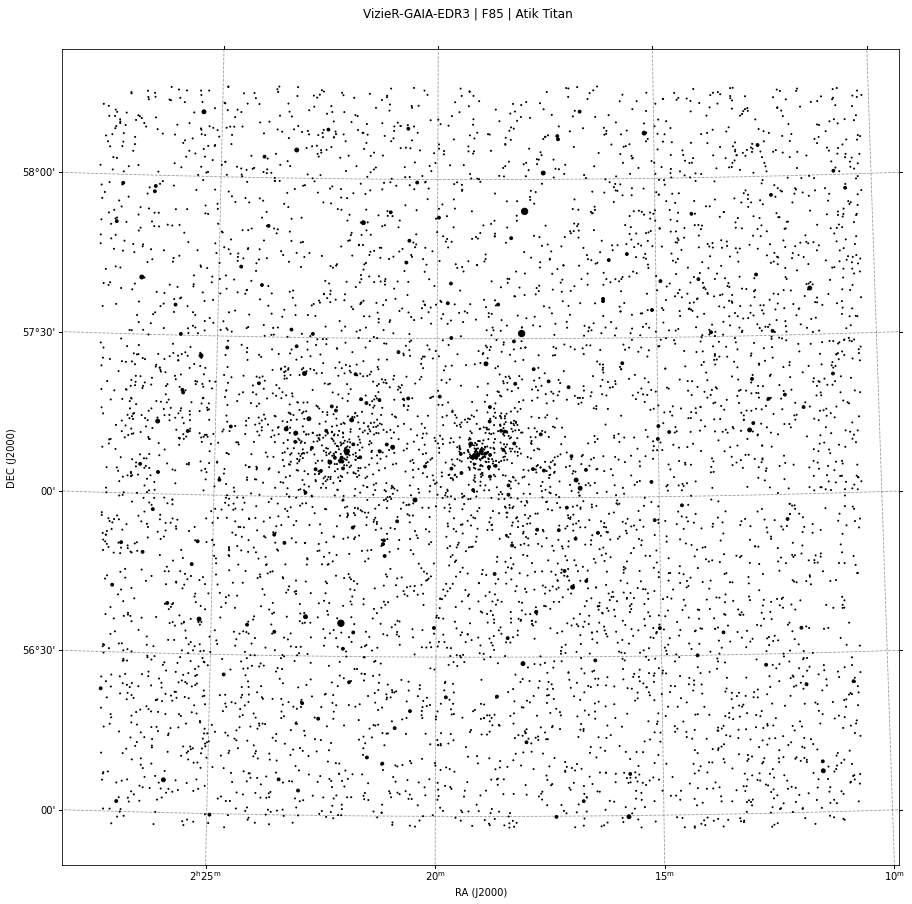

In [11]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection=WCS)
ax.grid(b = True, linestyle = '--', color = 'black', alpha = 0.40)
ax.scatter(data['RA'], data['DEC'], transform=ax.get_transform('icrs'), s=data['MARKER'],edgecolor='black', facecolor='black')
fig.suptitle(title, y = 0.92, fontsize = 12)
plt.xlabel(C.RA_J2000)
plt.ylabel(C.DEC_J2000)
# Display
plt.show()